In [251]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
import pandas as pd
import astropy.cosmology as apc
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=100, Om0=0.3, Tcmb0=2.725) #std cosmo for that analysis

Data loading

In [252]:
dfres = pd.read_csv('SDSS_DR8-test_results-w_size.csv')

In [253]:
dfsch = dfres[dfres['M_prodK_r'] < 30]
eventno = len(dfsch)

In [ ]:
dfsch.sort_values(by='M_prodK_r',kind='mergesort',ignore_index=True,inplace=True,ascending=True)        # sorting to make it easier to keep the ordering of absmag values accordingly with Vmax (more visual than reasonable)

In [255]:
dfsch.iloc[:,9:]

,M_prodK_u,M_prodK_g,M_prodK_r,M_prodK_i,M_prodK_z,M_prodYC_u,M_prodYC_g,M_prodYC_r,M_prodYC_i,M_prodYC_z,M_prod_err_u,M_prod_err_g,M_prod_err_r,M_prod_err_i,M_prod_err_z,size_deg^2_u,size_deg^2_g,size_deg^2_r,size_deg^2_i,size_deg^2_z
0,-21.584795,-21.701984,-22.927643,-23.354334,-23.769768,-21.584794,-21.701987,-22.927640,-23.354334,-23.769768,0.279381,0.124318,0.035295,0.030716,0.084684,6.020639e-05,0.000002,0.000003,0.000003,0.000018
1,-19.826418,-21.909708,-22.879236,-23.268957,-23.576750,-19.826420,-21.909707,-22.879235,-23.268956,-23.576750,0.513496,0.028503,0.015636,0.016625,0.036333,4.838399e-06,0.000007,0.000006,0.000007,0.000004
2,-19.778080,-22.014616,-22.851082,-23.235022,-23.498747,-19.778081,-22.014616,-22.851083,-23.235022,-23.498747,0.228059,0.015560,0.012247,0.011561,0.021370,9.939531e-06,0.000018,0.000017,0.000016,0.000012
3,-21.049469,-21.766911,-22.810181,-23.141958,-23.389742,-21.049469,-21.766910,-22.810181,-23.141959,-23.389742,0.351351,0.076139,0.024182,0.026102,0.053465,6.805659e-07,0.000003,0.000003,0.000002,0.000002
4,-21.272236,-21.961872,-22.783274,-23.150677,-23.291576,-21.272235,-21.961873,-22.783273,-23.150674,-23.291575,0.360259,0.059360,0.035029,0.030227,0.059407,6.009092e-05,0.000003,0.000002,0.000002,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,-14.220031,-14.970018,-14.875952,-14.284077,-14.003883,-14.220031,-14.970018,-14.875951,-14.284076,-14.003885,0.024542,0.032935,0.026099,0.032952,0.084401,3.376080e-06,0.000003,0.000005,0.000006,0.000003
984,-13.002986,-14.265306,-14.615516,-14.537563,-14.329227,-13.002986,-14.265306,-14.615515,-14.537563,-14.329228,0.069966,0.011628,0.009519,0.028931,0.096590,1.478183e-04,0.000025,0.000022,0.000020,0.000013
985,-12.586421,-13.830516,-14.332994,-14.561669,-14.787351,-12.586420,-13.830515,-14.332994,-14.561669,-14.787350,0.068978,0.011530,0.010452,0.013545,0.037564,1.103049e-06,0.000001,0.000002,0.000002,0.000048
986,-11.431541,-13.028088,-13.510315,-13.748533,-14.004622,-11.431540,-13.028088,-13.510314,-13.748533,-14.004623,0.296464,0.034407,0.037153,0.041042,0.103052,9.466404e-07,0.000002,0.000002,0.000002,0.000014


In [256]:
sch_c = 3*10**5 * u.km/u.s
schMr = dfsch['M_prodK_r']
schMr_l = schMr.min()
schMr_u = schMr.max()

sch_z = dfsch['redshift']
sch_z_max = sch_z.max()

sch_L = np.exp(-0.4*schMr)
#E_func = np.sqrt(cosmo.Ode0 + cosmo.Ok0 * (1+sch_z)**2 + cosmo.Om0 * (1+sch_z)**3)
sch_dl = cosmo.luminosity_distance(sch_z)

Visualizing absmag values

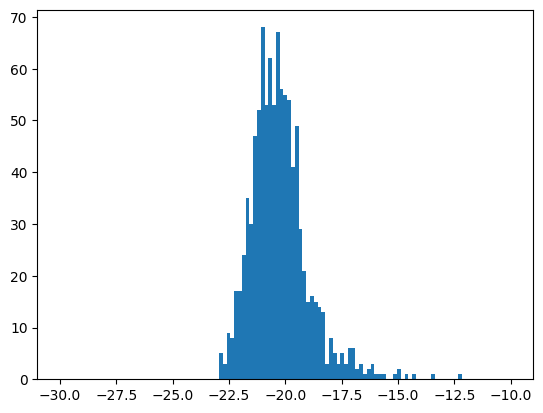

In [257]:
histM = plt.hist(schMr,bins=np.linspace(-30,-10,120))

Defining the the comoving volume function (Eales 1993)

In [258]:
def V(x):
    return ((1+x)**2 * np.sqrt(cosmo.Ode0 + cosmo.Om0 * (1+x)**3))**(-1)

integ,_ = sp.integrate.quad(lambda x:V(x), 0,sch_z_max)
V_max = np.array(9583*sch_c*sch_dl**2/cosmo.H0 * integ /u.Mpc**3)   # defining Vmax

<Axes: >

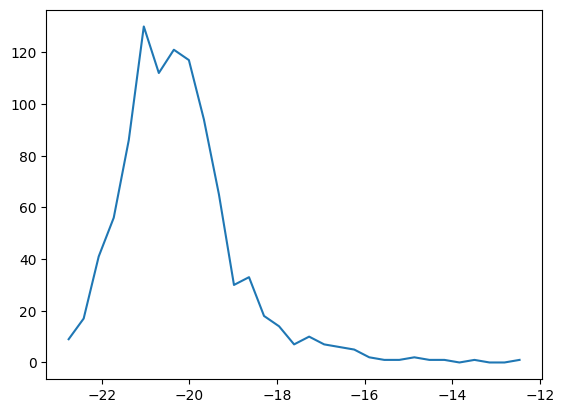

In [ ]:
counts,edges = np.histogram(schMr, bins=int(np.sqrt(len(schMr)))) # binning the absolute mags
optedges = 0.5*(edges[1:]+edges[:-1])
s=pd.Series(counts,index=optedges)
s.plot()

In [ ]:
sumIV_max_binned = np.zeros(len(counts))    # 1/Vmax summation based on the absmag bins

prevEnd = 0

for idx, count in enumerate(counts):
    V_max_for_count = V_max[prevEnd:prevEnd+count]
    sumIV_max_binned[idx] = np.sum(1/V_max_for_count)

    prevEnd = prevEnd + count

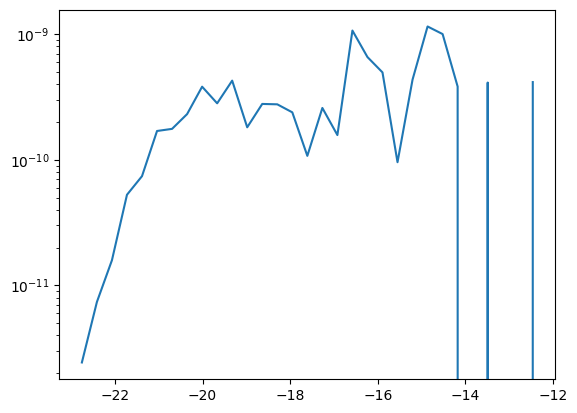

In [288]:
plt.plot(optedges, sumIV_max_binned)
plt.yscale('log')

Defining the Schechter function

In [ ]:
from scipy.optimize import curve_fit

#single
def func(x, M_star, alpha, phi):
    return 0.4*np.log(10)*phi*10**(-0.4*(1+alpha)*(x-M_star))*np.exp(-1*(10)**(-0.4*(x-M_star)))

#double
def doubfunc(x, M_star, alpha1, phi1, alpha2, phi2):
    return 0.4*np.log(10)*(phi1*10**(-0.4*(1+alpha1)*(x-M_star))+phi2*10**(-0.4*(1+alpha2)*(x-M_star)))*np.exp(-1*(10)**(-0.4*(x-M_star)))

In [ ]:
#fit_sel = (optedges > -40) & (optedges < -9)       # NYU-VAGC masking for missing galaxies
coeffs, cov = curve_fit(func, optedges, sumIV_max_binned, p0=[-22,-2,1e-6]) #fitting the Schechter function
coeffs, cov     #checking values

(array([-2.07279726e+01, -9.73056219e-01,  4.99929885e-10]),
 array([[1.23002376e+00, 7.16708952e-02, 1.85335846e-10],
        [7.16708952e-02, 9.65468627e-03, 2.22113270e-11],
        [1.85335846e-10, 2.22113270e-11, 5.75530172e-20]]))

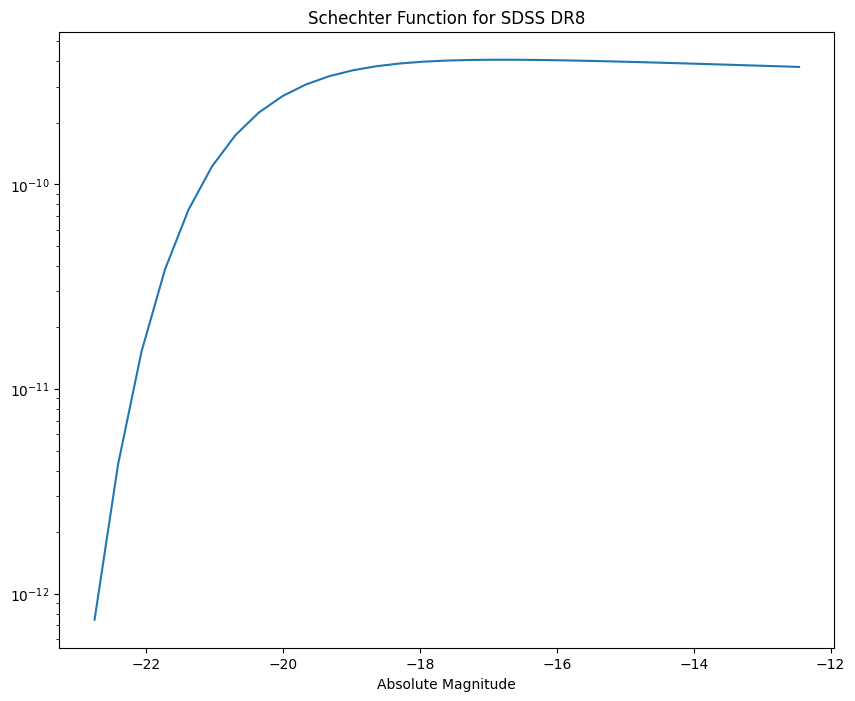

In [303]:
fig, ax = plt.subplots()
ax.plot(optedges, func(optedges,*coeffs))
ax.set_xlabel('Absolute Magnitude')
ax.set_title('Schechter Function for SDSS DR8')
ax.set_yscale('log')
ax.set_xscale('linear')
#ax.set_xbound(-22.5,-17)           #enable to see a close-up
#ax.set_ybound(1e-12,1e-9)
fig.set_size_inches(10,8)
plt.show()